#----------------***********((Question One))***********----------------

###----------------Part One - Question One----------------
1. Try to plot this relationship on your own using matplotlib. You can also visualize the test data
to see if it gives you any clues about the underlying relationship between the variables.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

x_train= np.load('x_train.npy', mmap_mode='r')
x_test= np.load('x_test.npy', mmap_mode='r')
y_train= np.load('y_train.npy', mmap_mode='r')
y_test= np.load('y_test.npy', mmap_mode='r')

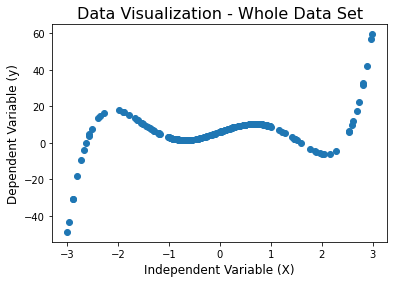

<Figure size 432x288 with 0 Axes>

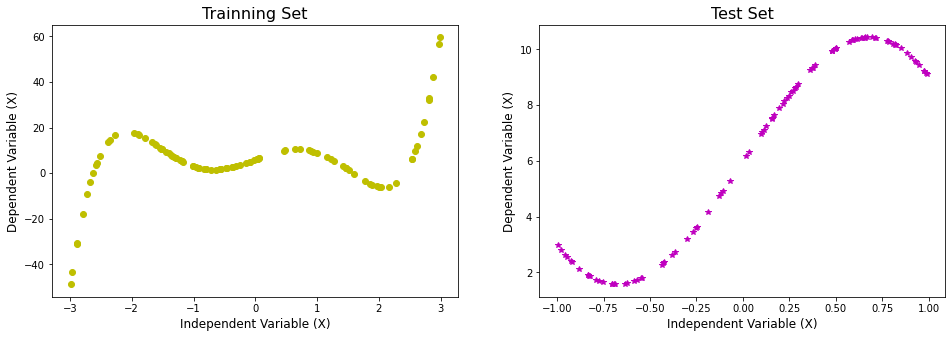

In [ ]:

#Plotting the whole data-set
x_set = np.append(x_train, x_test)
y_set = np.append(y_train, y_test)

plt.xlabel("Independent Variable (X)", fontsize=12)
plt.ylabel("Dependent Variable (y)", fontsize=12)
plt.title("Data Visualization - Whole Data Set", fontsize=16)
plt.plot(x_set, y_set, 'o')
plt.show()


#Data visualization for both training and test set:
fig, axs = plt.subplots(0,2)
f = plt.figure(figsize=(16,5))

ax = f.add_subplot(121)
plt.xlabel("Independent Variable (X)", fontsize=12)
plt.ylabel("Dependent Variable (X)", fontsize=12)

ax2 = f.add_subplot(122)
plt.xlabel("Independent Variable (X)", fontsize=12)
plt.ylabel("Dependent Variable (X)", fontsize=12)

ax.plot(x_train, y_train, 'yo')
ax2.plot(x_test, y_test,'m*')
ax.set_title('Trainning Set', fontsize=16)
ax2.set_title('Test Set', fontsize=16)
plt.show()

*It is important to notice that x range in the test set is between -1 and 1, while it is not the case for the training set.*

###----------------Part Two - Question One----------------

a. Is the relationship linear?

a) No, the relationship is not linear, which means we cannot employ a linear relation (i.e. y=mx+b) to correctly model the data set. We need polynomial terms of x and/or other funcitons of x (e.g. sin(x) or cos(x)) to obtain an equation which fits the data.

b. Do you need feature engineering to add any non-linearity?

b) Yes, we need feature engineering, since the linear equation by itself does not lead us to a proper relation governing between x and y, so I need to consider other basis functions.

i. If so, how can you engineer these features?

i) We can use feature engineering to obtain insights regarding the governing relationship between x and y by either looking at Xs' behavior versus y and the trend or just trying different funcitons of x. Of course watching the trend of x-y is a really useful guidance in feature engineering.

ii. What are some functions that you can try?

ii) Based on the behvaior of the training set I am thinking about a combinaiton of x^5 (5th order of power of x) and other smaller powers of x. Also, the test set brings this to my mind that sin(x) and cos(x) can be other useful funcitons as well.

ii-1. Plot each of them individually to verify!

ii-1) There were some of the other fuctions I have tried. Here, I present the best fit:

In [ ]:
# Data importing
x_train= np.load('x_train.npy', mmap_mode='r')
x =x_train.flatten()
y_train= np.load('y_train.npy', mmap_mode='r')
Y=y_train

#Coeffs and Constants
coeffs=[0.01]*6

LR = 0.00001 # learning Rate
iter= 1000000  # no of iterations 

a=(coeffs[0])
b=(coeffs[1])
c=(coeffs[2])
d=(coeffs[3])
e=(coeffs[4])
f=(coeffs[5])

# Gradient Descent - Main Body
LLMS=[]
for i in range(iter): 

    Y_predi = np.multiply((np.power(x, 5)),a)+np.multiply((np.power(x, 4)),b)+np.multiply((np.power(x, 3)),c)+np.multiply((np.power(x, 2)),d)+np.multiply((np.power(x, 1)),e)+f  # The current predicted value of Y
    Y_pred =Y_predi.flatten()
    
    x_5=(np.power(x, 5))
    partial_a = np.multiply(x_5,(Y - Y_pred))
    x_4=(np.power(x, 4))
    partial_b= x_4* (Y - Y_pred)
    x_3=(np.power(x, 3))
    partial_c = x_3* (Y - Y_pred)      
    x_2 = (np.power(x, 2))
    partial_d = x_2 * (Y - Y_pred)
    partial_e= x * (Y - Y_pred)
    partial_f = (Y - Y_pred)

#temporaty built 
    n = float(len(x))   
    D_a=(-2/n)*sum(partial_a)  
    D_b=(-2/n)*sum(partial_b) 
    D_c=(-2/n)*sum(partial_c) 
    D_d=(-2/n)*sum(partial_d) 
    D_e=(-2/n)*sum(partial_e) 
    D_f=(-2/n)*sum(partial_f) 

#Updating Coeffs
    a=a-LR*D_a
    b=b-LR*D_b
    c=c-LR*D_c  
    d=d-LR*D_d
    e=e-LR*D_e
    f=f-LR*D_f
    
#LOSS   
    dif_y=(np.power((Y-Y_pred), 2))
    LMS=sum(dif_y)
    LLMS.append(LMS)


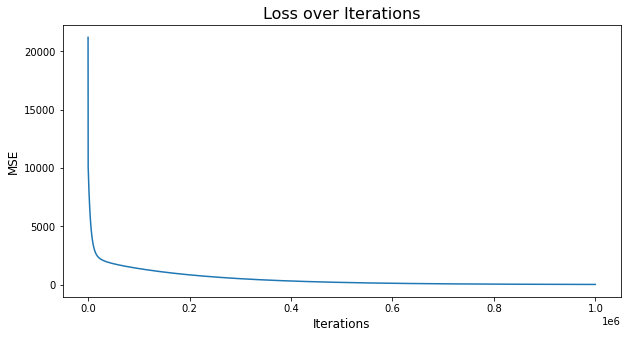

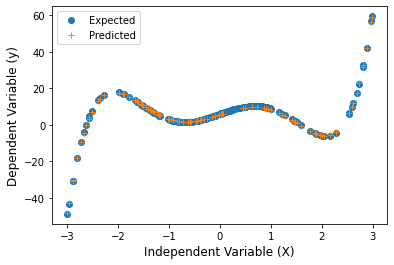


(*)My model suggests this equation for the relation of x-y:
y= 0.9638220423503725 *x^5+ -0.015913175337367566 *x^4+ -7.59173301656696 *x^3+
 0.17210933517395874 *x^2+ 9.03972467908796 *x+ 5.62197998643583


In [ ]:
# PLOTIING - LOSS
plt.figure(figsize=(10,5))
plt.plot(range(i+1), LLMS)
plt.title('Loss over Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()


# COMPARING MODEL AND REAL DATA
Y_model= np.multiply((np.power(x, 5)),a)+np.multiply((np.power(x, 4)),b)+np.multiply((np.power(x, 3)),c)+np.multiply((np.power(x, 2)),d)+np.multiply((np.power(x, 1)),e)+f  # The current predicted value of Y

plt.plot(x_set,y_set,'o')
plt.plot(x, Y_model, '+')
plt.legend(['Expected','Predicted'])
plt.xlabel('Independent Variable (X)', fontsize=12)
plt.ylabel('Dependent Variable (y)', fontsize=12)
plt.show()

#EQUATION:

print('\n(*)My model suggests this equation for the relation of x-y:')
print("y=",a,"*x^5+",b,"*x^4+",c,"*x^3+\n",d,"*x^2+",e,"*x+",f)

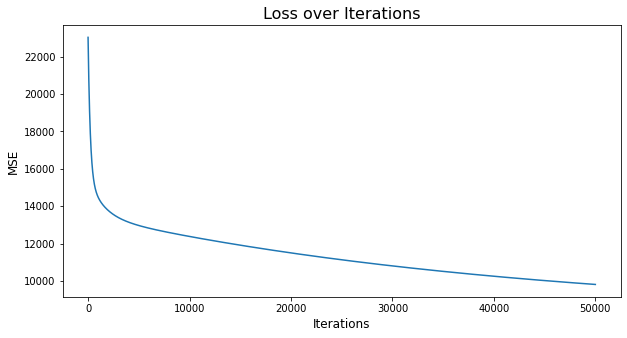

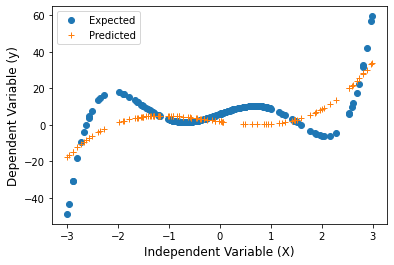


(*)My model suggests this equation for the relation of x-y:
y= 1.376816693298861 *x^3+ 0.7107438245449923 *x^2+ -3.6476888065022455 *x+ 2.001811227695688


In [ ]:
#Coeffs and Constants
coeffs=[0.01]*4

LR = 0.00001 # learning Rate
iter= 50000  # no of iterations 

c=coeffs[0]
d=coeffs[1]
e=coeffs[2]
f=coeffs[3]
# Gradient Descent - Main Body
LLMS=[]
for i in range(iter): 

    Y_predi = np.multiply((np.power(x, 3)),c)+np.multiply((np.power(x, 2)),d)+np.multiply((np.power(x, 1)),e)+f  # The current predicted value of Y
    Y_pred =Y_predi.flatten()

    x_3 = (np.power(x, 3))
    partial_c = x_3 * (Y - Y_pred)     
    x_2 = (np.power(x, 2))
    partial_d = x_2 * (Y - Y_pred)
    partial_e= x * (Y - Y_pred)
    partial_f = (Y - Y_pred)

#temporaty built 
    n = float(len(x)) 
    D_c=(-2/n)*sum(partial_c)        
    D_d=(-2/n)*sum(partial_d) 
    D_e=(-2/n)*sum(partial_e) 
    D_f=(-2/n)*sum(partial_f) 

#Updating Coeffs  
    c=c-LR*D_c
    d=d-LR*D_d
    e=e-LR*D_e
    f=f-LR*D_f
    
#LOSS   
    dif_y=(np.power((Y-Y_pred), 2))
    LMS=sum(dif_y)
    LLMS.append(LMS)


# PLOTIING - LOSS
plt.figure(figsize=(10,5))
plt.plot(range(i+1), LLMS)
plt.title('Loss over Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()


# COMPARING MODEL AND REAL DATA
Y_model=np.multiply((np.power(x, 3)),c)+np.multiply((np.power(x, 2)),d)+np.multiply((np.power(x, 1)),e)+f  # The current predicted value of Y

plt.plot(x_set,y_set,'o')
plt.plot(x, Y_model, '+')
plt.legend(['Expected','Predicted'])
plt.xlabel('Independent Variable (X)', fontsize=12)
plt.ylabel('Dependent Variable (y)', fontsize=12)
plt.show()

#EQUATION:

print('\n(*)My model suggests this equation for the relation of x-y:')
print("y=",c,"*x^3+",d,"*x^2+",e,"*x+",f)



Above mentioned is one of the other functions I have tried to show how badly it fits the data for:
Y= ax^3+bx^2+cx+d

#----------------***********((Question Two))***********----------------


###----------------Part One - Question Two----------------

1. What is the average least squares error for the given data using your simple linear regression model?

In [ ]:
from pandas.core.indexing import convert_from_missing_indexer_tuple
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('Assignment1_Q2_Data.csv')
df=df.apply(pd.to_numeric,errors='coerce')
y=df[df.columns[-1]][:] #last column - target vairable
coef=[1]*11 #features:11
coeffs=np.float64(coef)

L = 0.0000005 # Learning Rate
NI = 1000  # no of iterations
LLMS=[]


for k in range(NI): 
    
    Y_per=[]
    for j in range(len(df[df.columns[0]])):
        Y_pred=[]
        for i in range(len(df.columns)-2): # Last one - targer variable

            Y_predi=((df[df.columns[i+1]][j]*coeffs[i])) 
            Y_pred.append(Y_predi) 

        Y_predii=sum(Y_pred) ####:----h indeed!
        Y_per.append(Y_predii)

    Y_comp=Y_per-y

    LMS=sum(np.power(Y_comp, 2))*0.5
    LLMS.append(LMS)
  
#####################-------------------------------------   
#Updating    
    for j in range(len(df[df.columns[0]])):
        Y_pr=[]
        for i in range(0,len(df.columns)-2):     
            Y_pr=((df[df.columns[i+1]][j]*Y_comp[j])) 
            #updating
            coeffs[i]=coeffs[i]-L*Y_pr
#####################-------------------------------------   
#Least Mean Square
print('\nAverage least squares error for the given data using your simple linear regression model quals to',LLMS[-1],'\n')
  


Average least squares error for the given data using your simple linear regression model quals to 675.3373327455624 



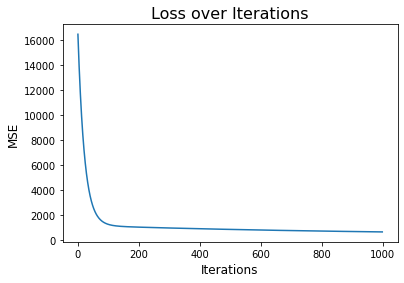



1 ) Weight of feature Local Price is: 1.232443996955132
2 ) Weight of feature Bathrooms is: 1.033651517254481
3 ) Weight of feature Land Area is: 1.1193686546968808
4 ) Weight of feature Living area is: 1.042591140135825
5 ) Weight of feature # Garages is: 1.0174576355324618
6 ) Weight of feature # Rooms is: 1.046381583105289
7 ) Weight of feature # Bedrooms is: 1.0254223116753267
8 ) Weight of feature Age of home is: 0.07695303227940774
9 ) Weight of feature Construction type is: 1.0006554321493386
10 ) Weight of feature Architecture type is: 1.0016985477867923
11 ) Weight of feature # Fire places is: 1.0154790230983668

+++++++++++SEEMINGLY Most Effective Factors+++++++++++

Three Most Effective Coefficients belong to the ( Local Price ), ( Land Area ), ( # Rooms ).

+++++++++++SEEMINGLY Least Effective Factors+++++++++++

Three Least Effective Coefficients belong to the ( Age of home ), ( Construction type ), ( Architecture type ).



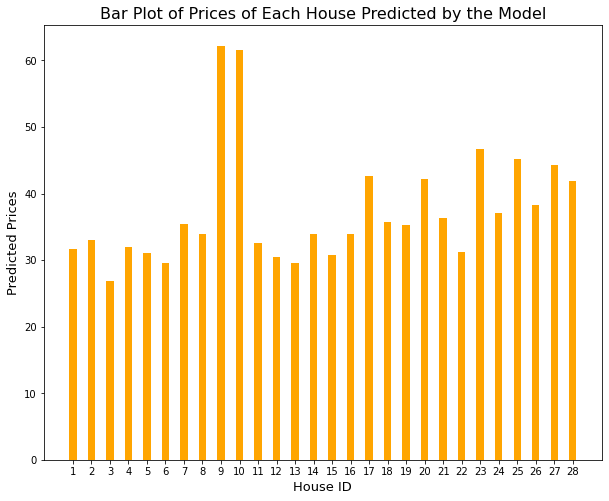

In [ ]:
#Plotting and Feature Sorting Guess
plt.plot(range(NI),LLMS)
plt.title('Loss over Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

new_coeffs=coeffs#[:-1]
print('\n')
for idx , x in enumerate(new_coeffs):
    kk=idx+1
    print(kk,') Weight of feature',df.columns[idx+1],'is:', x)
    
###### FEATURE SORTING 
sort = np.unique(abs(new_coeffs))
#MOST effective ones 
maxs=[sort[-1],sort[-2], sort[-3] ]
for idx , i in enumerate(new_coeffs):
  if i ==sort[-1]:
    max1=df.columns[idx+1]
  elif i==sort[-2]:
    max2=df.columns[idx+1]
  elif i==sort[-3]:
    max3=df.columns[idx+1]

########   
print('\n+++++++++++SEEMINGLY Most Effective Factors+++++++++++\n')
print('Three Most Effective Coefficients belong to the (',max1,'), (',max2,'), (',max3,').')
#Least effective ones  ###ABSOLUTE - to avoid negative but large and impactful features
maxs=[sort[0],sort[1], sort[2] ]
for idx , i in enumerate(new_coeffs):
  if abs(i) ==sort[0]:
    min1=df.columns[idx+1]
  elif abs(i) ==sort[1]:
    min2=df.columns[idx+1]
  elif abs(i) ==sort[2]:
    min3=df.columns[idx+1]

#######
print('\n+++++++++++SEEMINGLY Least Effective Factors+++++++++++\n')#ABS 
print('Three Least Effective Coefficients belong to the (',min1,'), (',min2,'), (',min3,').\n')
#####

# Price Output
Y_bl=[]
for j in range(len(df[df.columns[0]])):
    Y_al=[]    
    for i in range(0,len(df.columns)-2):           
        Y_a=((df[df.columns[i+1]][j]*new_coeffs[i])) 
        Y_al.append(Y_a) 

    Y_b=sum(Y_al) ####----h indeed!
    Y_bl.append(Y_b)


fig = plt.figure(figsize = (10, 8))
X = df[df.columns[0]][:]
Ys = Y_bl
X_axis = np.arange(len(X)) 
plt.bar(X_axis - 0, Ys, 0.4,color='orange') 
plt.xticks(X_axis, X)
plt.xlabel("House ID",fontsize=13)
plt.ylabel("Predicted Prices",fontsize=13)
plt.title("Bar Plot of Prices of Each House Predicted by the Model",fontsize=16)
plt.show()

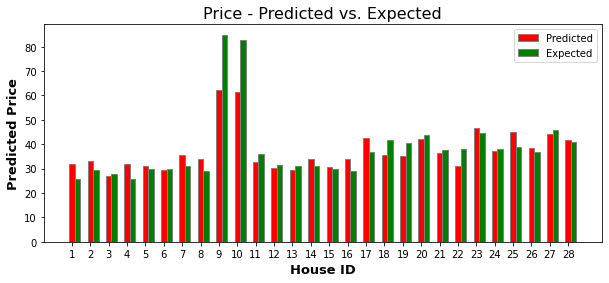

In [ ]:
#plot

barWidth = 0.3
fig = plt.subplots(figsize =(10,4))
br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,Y_bl, color ='r', width = barWidth, edgecolor ='grey', label ='Predicted')
plt.bar(br2,y, color ='g', width = barWidth, edgecolor ='grey', label ='Expected')
# Adding Xticks
plt.xlabel('House ID', fontweight ='bold', fontsize = 13)
plt.ylabel('Predicted Price', fontweight ='bold', fontsize = 13)
X_axis = np.arange(len(X)) 
plt.xticks(X_axis, X)
plt.legend()
plt.title("Price - Predicted vs. Expected",fontsize=16)
plt.show()



###----------------Part Two and Part Three - Question Two----------------

2. Which factor has the most effect on the final value? How do you know this? Can you use only this feature to predict the price?

3. Which factor has the least effect on the final value? How do you know this? What effect does removing this feature have on the performance?

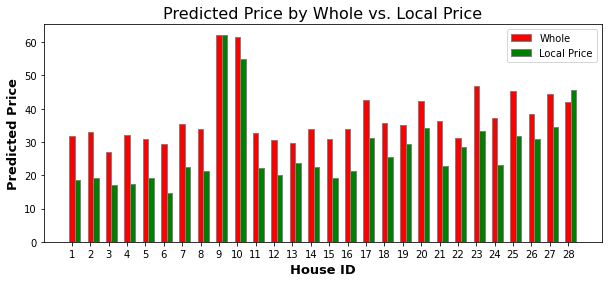

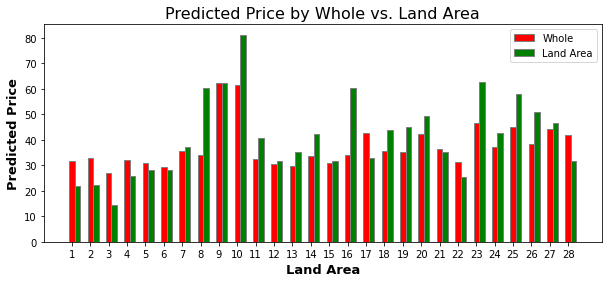

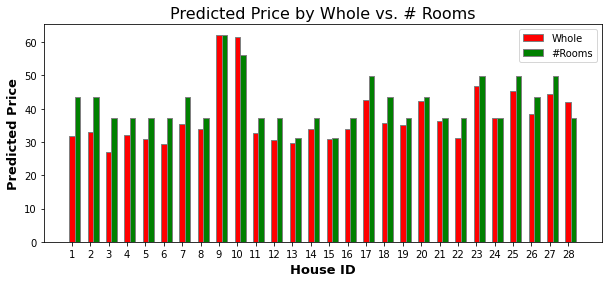

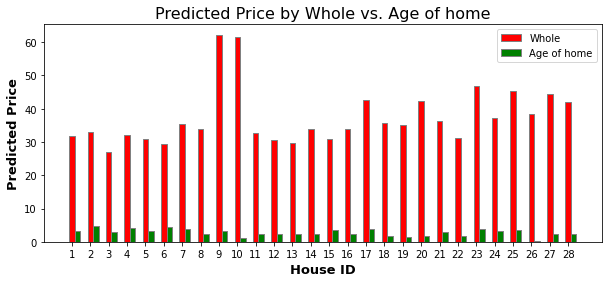

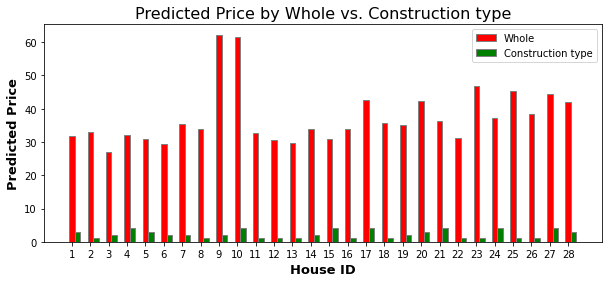

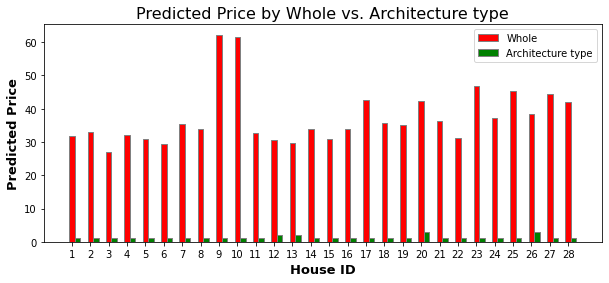

In [ ]:
#Local Price vs. Whole
Y_cl=[]
for j in range(len(df[df.columns[0]])):
     
    Y_c=(df[max1][j]*sort[-1])
    Y_cl.append(Y_c) 

#########ERROR COMPUTING
Y_bl=np.asarray(Y_bl)
Y_cl=np.asarray(Y_cl)
error1=(sum((Y_bl-Y_cl)**2))**0.5
error11=(sum((y-Y_cl)**2))**0.5
#plot
Y_dl=np.multiply(Y_cl,max(Y_bl/Y_cl[np.argmax(Y_bl)]))
barWidth = 0.3
fig = plt.subplots(figsize =(10,4))
br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,Y_bl, color ='r', width = barWidth, edgecolor ='grey', label ='Whole')
plt.bar(br2,Y_dl, color ='g', width = barWidth, edgecolor ='grey', label ='Local Price')
# Adding Xticks
plt.xlabel('House ID', fontweight ='bold', fontsize = 13)
plt.ylabel('Predicted Price', fontweight ='bold', fontsize = 13)
X_axis = np.arange(len(X)) 
plt.xticks(X_axis, X)
plt.legend()
plt.title("Predicted Price by Whole vs. Local Price",fontsize=16)
plt.show()

#########################
#Land Area vs. Whole

Y_cl=[]
for j in range(len(df[df.columns[0]])):
      
    Y_c=(df[max2][j]*sort[-2])
    Y_cl.append(Y_c) 

#########ERROR COMPUTING
Y_bl=np.asarray(Y_bl)
Y_cl=np.asarray(Y_cl)
error2=(sum((Y_bl-Y_cl)**2))**0.5
error22=(sum((y-Y_cl)**2))**0.5
#Plot
Y_dl=np.multiply(Y_cl,max(Y_bl/Y_cl[np.argmax(Y_bl)]))
barWidth = 0.3
fig = plt.subplots(figsize =(10,4))
br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,Y_bl, color ='r', width = barWidth, edgecolor ='grey', label ='Whole')
plt.bar(br2,Y_dl, color ='g', width = barWidth, edgecolor ='grey', label ='Land Area')
# Adding Xticks
plt.xlabel('Land Area', fontweight ='bold', fontsize = 13)
plt.ylabel('Predicted Price', fontweight ='bold', fontsize = 13)
X_axis = np.arange(len(X)) 
plt.xticks(X_axis, X)
plt.legend()
plt.title("Predicted Price by Whole vs. Land Area",fontsize=16)
plt.show()

#########################
# #ROOMS vs. Whole

Y_cl=[]
for j in range(len(df[df.columns[0]])):
    
    Y_c=(df[max3][j]*sort[-3])
    Y_cl.append(Y_c) 

#########ERROR COMPUTING
Y_bl=np.asarray(Y_bl)
Y_cl=np.asarray(Y_cl)
error3=(sum((Y_bl-Y_cl)**2))**0.5
error33=(sum((y-Y_cl)**2))**0.5

Y_dl=np.multiply(Y_cl,max(Y_bl/Y_cl[np.argmax(Y_bl)]))
barWidth = 0.3
fig = plt.subplots(figsize =(10,4))
# Set position of bar on X axis
br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,Y_bl, color ='r', width = barWidth, edgecolor ='grey', label ='Whole')
plt.bar(br2,Y_dl, color ='g', width = barWidth, edgecolor ='grey', label ='#Rooms')
# Adding Xticks
plt.xlabel('House ID', fontweight ='bold', fontsize = 13)
plt.ylabel('Predicted Price', fontweight ='bold', fontsize = 13)
X_axis = np.arange(len(X)) 
plt.xticks(X_axis, X)
plt.legend()
plt.title("Predicted Price by Whole vs. # Rooms",fontsize=16)
plt.show()


#########################
# Age of Home vs. Whole

Y_cl=[]
for j in range(len(df[df.columns[0]])):
     
    Y_c=(df[min1][j]*sort[0])
    Y_cl.append(Y_c) 

#########ERROR COMPUTING
Y_bl=np.asarray(Y_bl)
Y_cl=np.asarray(Y_cl)
error4=(sum((Y_bl-Y_cl)**2))**0.5
error44=(sum((y-Y_cl)**2))**0.5

Y_dl=Y_cl
barWidth = 0.3
fig = plt.subplots(figsize =(10,4))
#plot
br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,Y_bl, color ='r', width = barWidth, edgecolor ='grey', label ='Whole')
plt.bar(br2,Y_dl, color ='g', width = barWidth, edgecolor ='grey', label ='Age of home')
# Adding Xticks
plt.xlabel('House ID', fontweight ='bold', fontsize = 13)
plt.ylabel('Predicted Price', fontweight ='bold', fontsize = 13)
X_axis = np.arange(len(X)) 
plt.xticks(X_axis, X)
plt.legend()
plt.title("Predicted Price by Whole vs. Age of home",fontsize=16)
plt.show()

#########################
# Construction type vs. Whole
Y_cl=[]
for j in range(len(df[df.columns[0]])):      
    Y_c=(df[min2][j]*sort[1])
    Y_cl.append(Y_c) 

#########ERROR COMPUTING
Y_bl=np.asarray(Y_bl)
Y_cl=np.asarray(Y_cl)
error5=(sum((Y_bl-Y_cl)**2))**0.5
error55=(sum((y-Y_cl)**2))**0.5

Y_dl=Y_cl
barWidth = 0.3
fig = plt.subplots(figsize =(10,4))

br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,Y_bl, color ='r', width = barWidth, edgecolor ='grey', label ='Whole')
plt.bar(br2,Y_dl, color ='g', width = barWidth, edgecolor ='grey', label ='Construction type')
# Adding Xticks
plt.xlabel('House ID', fontweight ='bold', fontsize = 13)
plt.ylabel('Predicted Price', fontweight ='bold', fontsize = 13)
X_axis = np.arange(len(X)) 
plt.xticks(X_axis, X)
plt.legend()
plt.title("Predicted Price by Whole vs. Construction type",fontsize=16)
plt.show()

#########################
# Architecture type vs. Whole

Y_cl=[]
for j in range(len(df[df.columns[0]])):      
    Y_c=(df[min3][j]*sort[2])
    Y_cl.append(Y_c) 

#########ERROR COMPUTING
Y_bl=np.asarray(Y_bl)
Y_cl=np.asarray(Y_cl)
error6=(sum((Y_bl-Y_cl)**2))**0.5
error66=(sum((y-Y_cl)**2))**0.5

Y_dl=Y_cl
barWidth = 0.3
fig = plt.subplots(figsize =(10,4))

br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,Y_bl, color ='r', width = barWidth, edgecolor ='grey', label ='Whole')
plt.bar(br2,Y_dl, color ='g', width = barWidth, edgecolor ='grey', label ='Architecture type')
# Adding Xticks
plt.xlabel('House ID', fontweight ='bold', fontsize = 13)
plt.ylabel('Predicted Price', fontweight ='bold', fontsize = 13)
X_axis = np.arange(len(X)) 
plt.xticks(X_axis, X)
plt.legend()
plt.title("Predicted Price by Whole vs. Architecture type",fontsize=16)
plt.show()

########
# Y_cl=[]
# for j in range(len(df[df.columns[0]])):
    
#     Y_c=(df[max3][j]*sort[-3])
#     Y_cl.append(Y_c) 

# fig = plt.figure(figsize = (10, 8))
# X = df[df.columns[0]][:]
# Ys = Y_cl
# X_axis = np.arange(len(X)) 
# plt.bar(X_axis - 0, Ys, 0.4,color='m') 
# plt.xticks(X_axis, X)
# plt.xlabel("House ID",fontsize=15)
# plt.ylabel("Predicted Prices",fontsize=15)
# plt.title("Bar Plot of Prices of Each House Predicted by the (Land Area) Feature",fontsize=16)
# plt.show()

In [ ]:
error=[error1,error2,error3,error4,error5,error6] #compared to the wohle-predicted
error_d=[[error11,error22,error33,error44,error55,error66]]#compared to the real-data|expected
sort=[max1,max2,max3,min3,min2,min1]

for idx, i in enumerate(sort):
  print("Error regarding the feature (",i,") =",error[idx])

Error regarding the feature ( Local Price ) = 153.07284252953667
Error regarding the feature ( Land Area ) = 163.19849118436252
Error regarding the feature ( # Rooms ) = 165.35123601742225
Error regarding the feature ( Architecture type ) = 188.48603107641875
Error regarding the feature ( Construction type ) = 190.75761326221232
Error regarding the feature ( Age of home ) = 196.3518072578247


(*) Based on my two-step previous analysis, (Land Area) and (Local Price) are the two most effective features in predicting the house price. What were those two-step analyses? I focused on the impact of each feature "alone" on the predicting of the price, which is presented in the above bar plots. Also, I computed the error to see how much each feature prediction deviates from the whole data prediction, i.e. not limited to a specific feature.

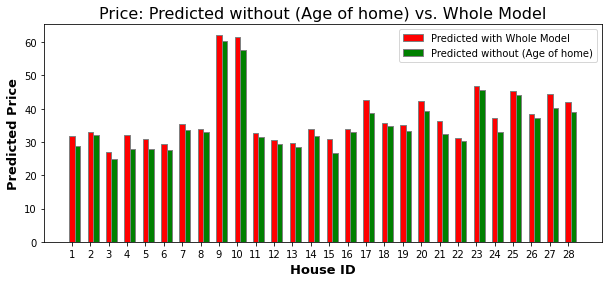

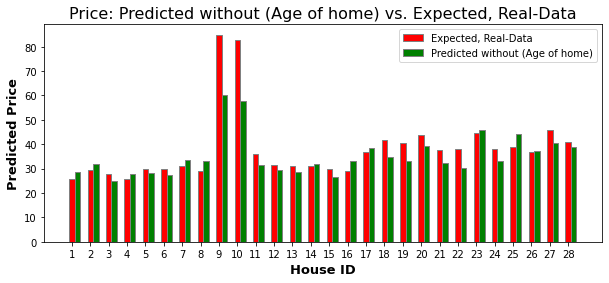

In [ ]:
# Price Output
Y_hl=[]
for j in range(len(df[df.columns[0]])):
    Y_al=[]    
    for i in range(0,len(df.columns)-2):     
        if i==8:
          new_coeffs[i]=0

        Y_a=((df[df.columns[i+1]][j]*new_coeffs[i])) 
        Y_al.append(Y_a) 

    Y_h=sum(Y_al) ####----h indeed!
    Y_hl.append(Y_h)

barWidth = 0.3
fig = plt.subplots(figsize =(10,4))

br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,Y_bl, color ='r', width = barWidth, edgecolor ='grey', label ='Predicted with Whole Model')
plt.bar(br2,Y_hl, color ='g', width = barWidth, edgecolor ='grey', label ='Predicted without (Age of home)')
# Adding Xticks
plt.xlabel('House ID', fontweight ='bold', fontsize = 13)
plt.ylabel('Predicted Price', fontweight ='bold', fontsize = 13)
X_axis = np.arange(len(X)) 
plt.xticks(X_axis, X)
plt.legend()
plt.title("Price: Predicted without (Age of home) vs. Whole Model",fontsize=16)
plt.show()


####

barWidth = 0.3
fig = plt.subplots(figsize =(10,4))

br1 = np.arange(len(X))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1,y, color ='r', width = barWidth, edgecolor ='grey', label ='Expected, Real-Data')
plt.bar(br2,Y_hl, color ='g', width = barWidth, edgecolor ='grey', label ='Predicted without (Age of home)')
# Adding Xticks
plt.xlabel('House ID', fontweight ='bold', fontsize = 13)
plt.ylabel('Predicted Price', fontweight ='bold', fontsize = 13)
X_axis = np.arange(len(X)) 
plt.xticks(X_axis, X)
plt.legend()
plt.title("Price: Predicted without (Age of home) vs. Expected, Real-Data",fontsize=16)
plt.show()

(*) The two above figures show that:
1- Price predicted without the "Age of home" feature is really close to the predicted price using the model and considering all the features which illustrates how small effect has the feature of "Age of home" in predicting the price.
2- The similarity between the expected price derived from the real-data and the predicted price without the "Age of home" feature puts emphasis on this fact as well.
I did this comparison with other features, and it led me to nominate the "Age of home" as the least effective feature.

#----------------***********((Question Three))***********----------------


###----------------Part One & Two - Question Three----------------

1. Do you need any basis functions when using the locally weighted approach?

No. Based on the nature of this method, I do not need any basis funciton. It is a non-parametric, non-iterative method that I employed here.

2. What is the difference between this implementation and the one for Question 1?

As mentioned in my previous answer, its nature is completely different. For quesiton 1, I first assigned some initial coefficients, which are updated through each loop, and it had to go along many iterative steps. However, for this question while applying locally weighted method, I needed to consider some points, and thanks to the super-easy "weight assigning" approach, the computational cost decreased a lot. Nontheless, I am aware of this fact that it is because of the small data-set and is a decent method when we are unaware of the sorting of the importance of features.

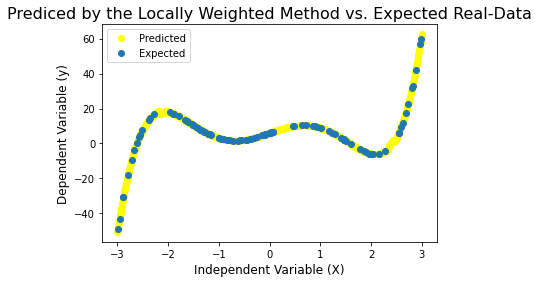

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=np.load('x_train.npy', mmap_mode='r')
Y= np.load('y_train.npy', mmap_mode='r')
bw=0.05 #BAND WIDTH

def LWR(chose, X, Y, bw):
    chose = np.r_[1, chose] #otherwise, I cannot take the inverse;
    X = np.c_[np.ones(len(X)), X]

    #WEIGHTS
    wght=np.exp(np.sum((X - chose) ** 2, axis=1) * (-1/(2*bw**2)))
    #matrices
    xtrans=X.T
    xw = X.T * wght
    xwy=xw @ Y
    xwx=xw@X
    theta = np.linalg.pinv(xwx) @ xwy
    return chose @ theta

points = np.linspace(-3, 3, num=1000)

model = [LWR(x0, X, Y, bw) for x0 in points]
plt.figure()
plt.plot(points, model,'o', color='yellow')
plt.plot(X, Y, 'o')
plt.legend(['Predicted','Expected'])
plt.xlabel('Independent Variable (X)', fontsize=12)
plt.ylabel('Dependent Variable (y)', fontsize=12)
plt.title("Prediced by the Locally Weighted Method vs. Expected Real-Data",fontsize=16)
plt.show()
